In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load dataset using safe encoding
df = pd.read_csv('../data/SampleSuperstore.csv', encoding='latin1')
df.head()

df.info()
df.describe()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [30]:
df.info()
df.describe()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime
df['Fiscal Year'] = df['Order Date'].apply(lambda x: x.year if x.month >= 4 else x.year - 1)
df['Month-Year'] = df['Order Date'].dt.to_period('M')


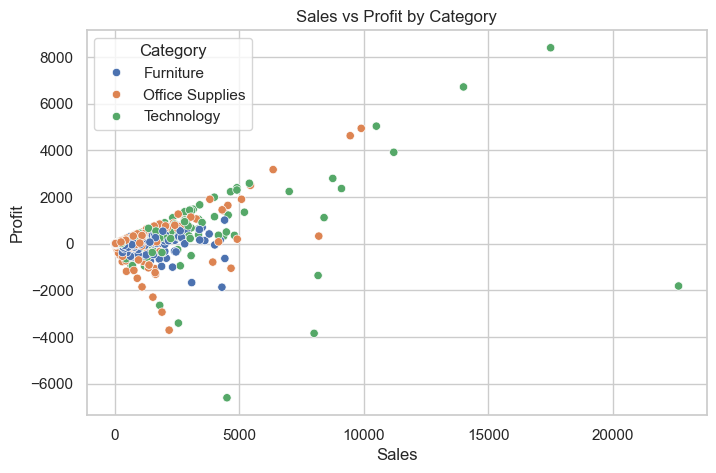

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.show()


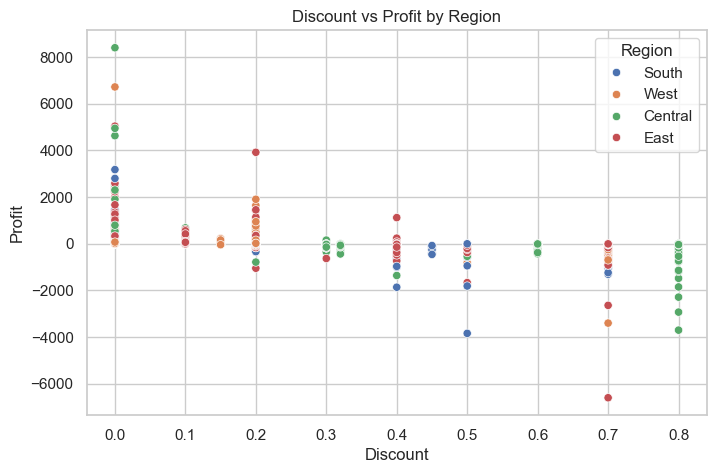

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Region')
plt.title('Discount vs Profit by Region')
plt.show()


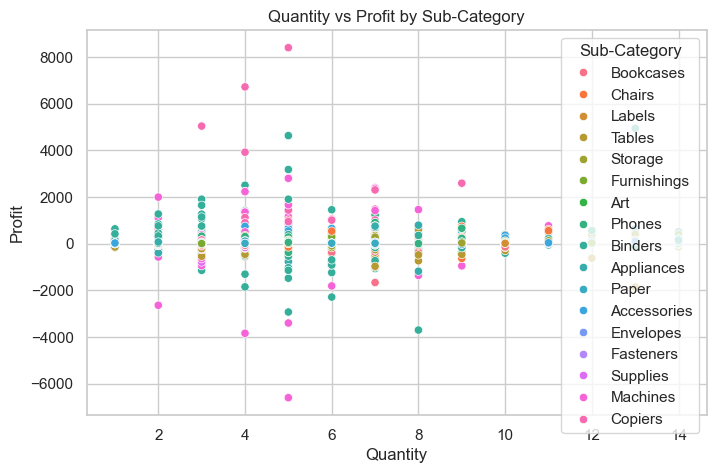

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Sub-Category')
plt.title('Quantity vs Profit by Sub-Category')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_24516\725657809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.values, y=region_profit.index, palette='viridis')


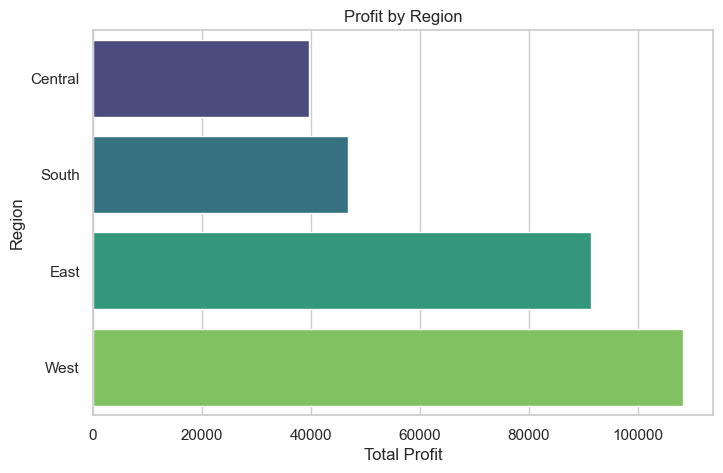

In [35]:
plt.figure(figsize=(8,5))
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
sns.barplot(x=region_profit.values, y=region_profit.index, palette='viridis')
plt.title("Profit by Region")
plt.xlabel("Total Profit")
plt.show()


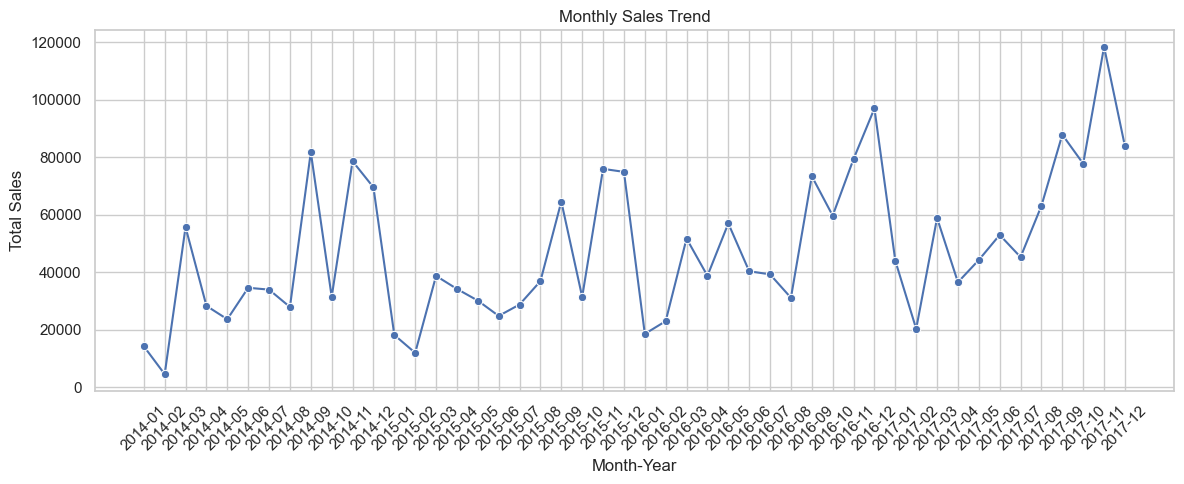

In [36]:
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()
